845.34678 
845.34678 
-0.05775498495173656


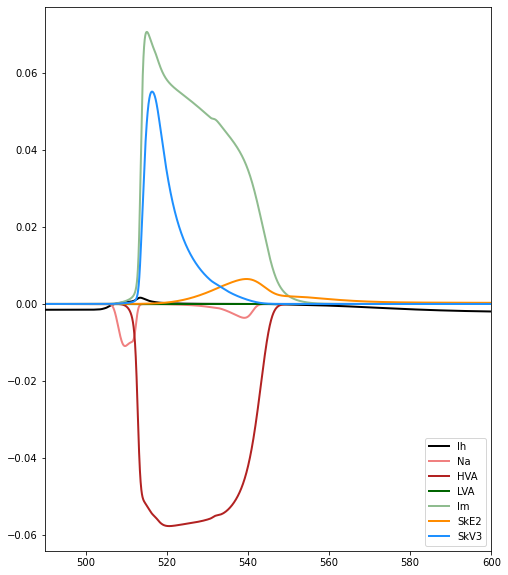

In [1]:
import os
import sys
import numpy as np
import neuron
from neuron import h
from neuron.units import ms, mV
from neuron import gui
from matplotlib import pyplot as plt
import csv
from math import exp, log
import scipy

h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
# h.load_file("L5PCbiophysWhat.hoc")
h.load_file("L5PCbiophys5c.hoc")
h.load_file("L5PCtemplate_2.hoc")
L5PC = h.L5PCtemplate(morphology_file)
h.celsius = 37

apic_secs = list(L5PC.all)
for sec in apic_secs:
    for seg in sec:
        try: seg.Ih.vshift = seg.Ih.vshift - 0
        except AttributeError: continue 

fig, ax = plt.subplots(figsize=(8, 10))
t = h.Vector().record(h._ref_t)
som_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
distal_v = h.Vector().record(L5PC.apic[36](0.9)._ref_v)
proximal_v = h.Vector().record(L5PC.apic[20](0.5)._ref_v)

current_epsp = h.epsp(L5PC.apic[36](0.9))
current_epsp.tau0 = 0.6
current_epsp.tau1 = 7
current_epsp.imax = 0.5
current_epsp.onset = 505

current_som = h.IClamp(L5PC.soma[0](0.5))
current_som.delay = 500
current_som.dur = 5 
current_som.amp = 1.9

Ih = h.Vector().record(L5PC.apic[36](0.9).Ih._ref_ihcn)
Na = h.Vector().record(L5PC.apic[36](0.9).NaTs2_t._ref_ina)
HVA = h.Vector().record(L5PC.apic[36](0.9).Ca_HVA._ref_ica)
LVA = h.Vector().record(L5PC.apic[36](0.9).Ca_LVAst._ref_ica)
Im = h.Vector().record(L5PC.apic[36](0.9).Im._ref_ik)
SkE2 = h.Vector().record(L5PC.apic[36](0.9).SK_E2._ref_ik)
SkV3 = h.Vector().record(L5PC.apic[36](0.9).SKv3_1._ref_ik)

# Ih = h.Vector().record(L5PC.apic[20](0.9).Ih._ref_ihcn)
# Na = h.Vector().record(L5PC.apic[20](0.9).NaTs2_t._ref_ina)
# HVA = h.Vector().record(L5PC.apic[20](0.9).Ca_HVA._ref_ica)
# LVA = h.Vector().record(L5PC.apic[20](0.9).Ca_LVAst._ref_ica)
# Im = h.Vector().record(L5PC.apic[20](0.9).Im._ref_ik)
# SkE2 = h.Vector().record(L5PC.apic[20](0.9).SK_E2._ref_ik)
# SkV3 = h.Vector().record(L5PC.apic[20](0.9).SKv3_1._ref_ik)

# Ih = h.Vector().record(L5PC.soma[0](0.5).Ih._ref_ihcn)
# Na = h.Vector().record(L5PC.soma[0](0.5).NaTs2_t._ref_ina)
# HVA = h.Vector().record(L5PC.soma[0](0.5).Ca_HVA._ref_ica)
# LVA = h.Vector().record(L5PC.soma[0](0.5).Ca_LVAst._ref_ica)
# Im = h.Vector().record(L5PC.soma[0](0.5).Im._ref_ik)
# SkE2 = h.Vector().record(L5PC.soma[0](0.5).SK_E2._ref_ik)
# SkV3 = h.Vector().record(L5PC.soma[0](0.5).SKv3_1._ref_ik)

soma_cur = h.Vector().record(current_som._ref_i)
cur_i = h.Vector().record(current_epsp._ref_i)

v_rest = -80.28

h.finitialize(v_rest*mV)
h.continuerun(600*ms)

ax.plot(t, Ih, 'black', linewidth=2, label='Ih')
ax.plot(t, Na, 'lightcoral', linewidth=2, label='Na')
ax.plot(t, HVA, 'firebrick', linewidth=2, label='HVA')
ax.plot(t, LVA, 'darkgreen', linewidth=2, label='LVA')
ax.plot(t, Im, 'darkseagreen', linewidth=2, label='Im')
ax.plot(t, SkE2, 'darkorange', linewidth=2, label='SkE2')
ax.plot(t, SkV3, 'dodgerblue', linewidth=2, label='SkV3')
ax.set(xlim=(490,600))
ax.legend(loc = 'lower right')
print(min(HVA))

plt.show()